<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.026356,56.082934,-3.103137,137.006153,140.304944,-3.298791
1,0.0,1.0,24.874013,73.088137,-1.025911,106.936239,107.122348,-0.186109
2,0.0,2.0,41.458602,86.871447,9.253395,147.583444,138.000253,9.583191
3,0.0,3.0,43.693963,56.707526,4.513196,114.914684,109.876940,5.037744
4,0.0,4.0,47.140814,74.930310,7.308647,139.379771,131.778949,7.600822
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,88.998870,62.289629,1.099428,162.387927,162.134973,0.252954
119996,999.0,116.0,98.091227,58.199153,4.730465,171.020846,167.327240,3.693606
119997,999.0,117.0,66.804822,83.742749,-6.914577,153.632993,160.659757,-7.026764
119998,999.0,118.0,20.626513,68.700008,6.007310,105.333831,99.313658,6.020173


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.026356,56.082934,-3.103137,137.006153,140.304944,-3.298791
1,0.0,1.0,24.874013,73.088137,-1.025911,106.936239,107.122348,-0.186109
2,0.0,2.0,41.458602,86.871447,9.253395,147.583444,138.000253,9.583191
3,0.0,3.0,43.693963,56.707526,4.513196,114.914684,109.876940,5.037744
4,0.0,4.0,47.140814,74.930310,7.308647,139.379771,131.778949,7.600822
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,88.998870,62.289629,1.099428,162.387927,162.134973,0.252954
119996,999.0,116.0,98.091227,58.199153,4.730465,171.020846,167.327240,3.693606
119997,999.0,117.0,66.804822,83.742749,-6.914577,153.632993,160.659757,-7.026764
119998,999.0,118.0,20.626513,68.700008,6.007310,105.333831,99.313658,6.020173


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    74.026356  56.082934 -3.103137  137.006153  140.304944 -3.298791
      1.0    24.874013  73.088137 -1.025911  106.936239  107.122348 -0.186109
      2.0    41.458602  86.871447  9.253395  147.583444  138.000253  9.583191
      3.0    43.693963  56.707526  4.513196  114.914684  109.876940  5.037744
      4.0    47.140814  74.930310  7.308647  139.379771  131.778949  7.600822
...                ...        ...       ...         ...         ...       ...
999.0 115.0  88.998870  62.289629  1.099428  162.387927  162.134973  0.252954
      116.0  98.091227  58.199153  4.730465  171.020846  167.327240  3.693606
      117.0  66.804822  83.742749 -6.914577  153.632993  160.659757 -7.026764
      118.0  20.626513  68.700008  6.007310  105.333831   99.313658  6.020173
      119.0  52.602692  63.012442  1.576509  127.191643  126.067381  1.124262

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    74.026356  56.082934 -3.103137  137.006153  140.304944 -3.298791
      1.0    24.874013  73.088137 -1.025911  106.936239  107.122348 -0.186109
      2.0    41.458602  86.871447  9.253395  147.583444  138.000253  9.583191
      3.0    43.693963  56.707526  4.513196  114.914684  109.876940  5.037744
      4.0    47.140814  74.930310  7.308647  139.379771  131.778949  7.600822
...                ...        ...       ...         ...         ...       ...
999.0 115.0  88.998870  62.289629  1.099428  162.387927  162.134973  0.252954
      116.0  98.091227  58.199153  4.730465  171.020846  167.327240  3.693606
      117.0  66.804822  83.742749 -6.914577  153.632993  160.659757 -7.026764
      118.0  20.626513  68.700008  6.007310  105.333831   99.313658  6.020173
      119.0  52.602692  63.012442  1.576509  127.191643  126.067381  1.124262

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.026356,56.082934,-3.103137,137.006153,140.304944,-3.298791
1,0.0,1.0,24.874013,73.088137,-1.025911,106.936239,107.122348,-0.186109
2,0.0,2.0,41.458602,86.871447,9.253395,147.583444,138.000253,9.583191
3,0.0,3.0,43.693963,56.707526,4.513196,114.914684,109.876940,5.037744
4,0.0,4.0,47.140814,74.930310,7.308647,139.379771,131.778949,7.600822
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,88.998870,62.289629,1.099428,162.387927,162.134973,0.252954
119996,999.0,116.0,98.091227,58.199153,4.730465,171.020846,167.327240,3.693606
119997,999.0,117.0,66.804822,83.742749,-6.914577,153.632993,160.659757,-7.026764
119998,999.0,118.0,20.626513,68.700008,6.007310,105.333831,99.313658,6.020173


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    74.026356  56.082934 -3.103137  137.006153  140.304944 -3.298791
      1.0    24.874013  73.088137 -1.025911  106.936239  107.122348 -0.186109
      2.0    41.458602  86.871447  9.253395  147.583444  138.000253  9.583191
      3.0    43.693963  56.707526  4.513196  114.914684  109.876940  5.037744
      4.0    47.140814  74.930310  7.308647  139.379771  131.778949  7.600822
...                ...        ...       ...         ...         ...       ...
999.0 115.0  88.998870  62.289629  1.099428  162.387927  162.134973  0.252954
      116.0  98.091227  58.199153  4.730465  171.020846  167.327240  3.693606
      117.0  66.804822  83.742749 -6.914577  153.632993  160.659757 -7.026764
      118.0  20.626513  68.700008  6.007310  105.333831   99.313658  6.020173
      119.0  52.602692  63.012442  1.576509  127.191643  126.067381  1.124262

[120000 rows x 6 columns]

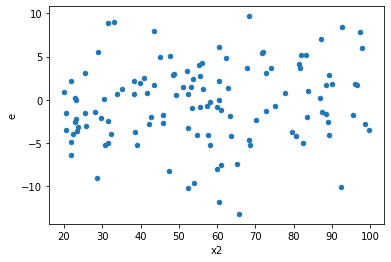

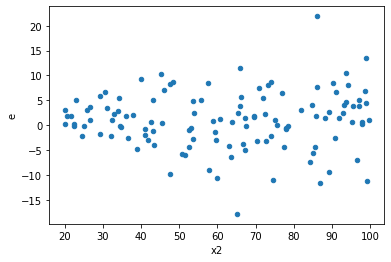

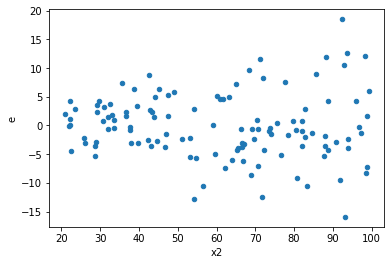

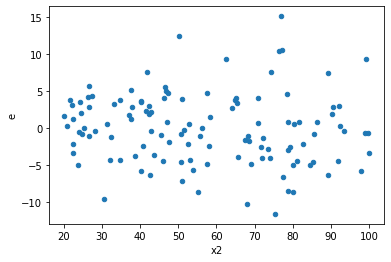

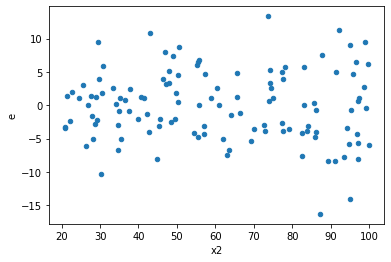

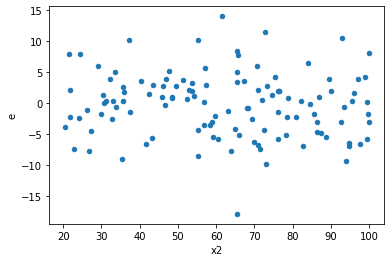

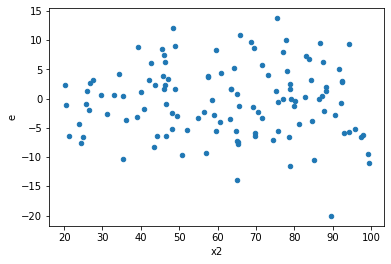

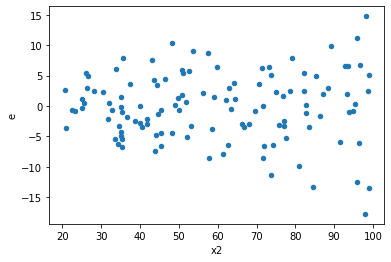

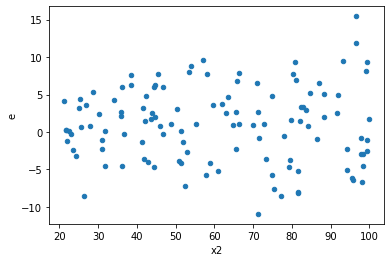

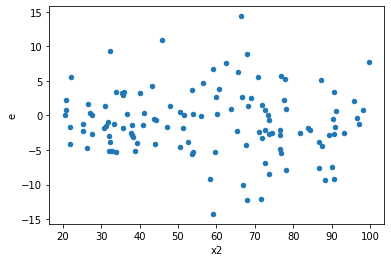

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,553.4645908855244,1961.932143935365,12.03183893229401,42.65069878120359,3.5448196257620395,3.502131972576983e-05,0.9999824893401371,1.7510659862884914e-05,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,893.1864565435939,1634.001585344622,19.417096881382474,35.521773594448305,1.8294070329590486,0.043171593951215836,0.9784142030243921,0.021585796975607918,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,867.8463450081545,1401.0087623105708,18.866224891481618,30.456712224142844,1.6143511698460937,0.1078878250266273,0.9460560874866863,0.05394391251331365,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,802.1160312622089,1783.3002028772075,17.437305027439326,38.7673957147219,2.2232446845265117,0.007806369075316288,0.9960968154623419,0.003903184537658144,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,1058.1724751349402,1616.1180563166122,23.00374945945522,35.133001224274174,1.5272728163813953,0.1547171608060216,0.9226414195969892,0.0773585804030108,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,1203.4058244884402,1530.8970553423028,26.16099618453131,33.28037076831093,1.272136983376391,0.4174506249851939,0.791274687507403,0.20872531249259696,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,874.1889584261728,1709.7703888396259,19.00410779187332,37.168921496513605,1.9558361751877695,0.024964726189169673,0.9875176369054152,0.012482363094584836,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,973.8226917113027,1692.3102871983963,21.1700585154631,36.789354069530354,1.737801246163706,0.06398616068348395,0.968006919658258,0.031993080341741975,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,741.2302824664631,1647.098068089514,16.113701792749197,35.806479741076394,2.22211383837254,0.007844741240320197,0.9960776293798399,0.003922370620160098,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,553.4645908855244,1961.932143935365,12.03183893229401,42.65069878120359,3.5448196257620395,3.502131972576983e-05,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,893.1864565435939,1634.001585344622,19.417096881382474,35.521773594448305,1.8294070329590486,0.043171593951215836,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,867.8463450081545,1401.0087623105708,18.866224891481618,30.456712224142844,1.6143511698460937,0.1078878250266273,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,802.1160312622089,1783.3002028772075,17.437305027439326,38.7673957147219,2.2232446845265117,0.007806369075316288,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,1058.1724751349402,1616.1180563166122,23.00374945945522,35.133001224274174,1.5272728163813953,0.1547171608060216,Reject005=1 : Homoscedasticity
5.0,46.0,46.0,1203.4058244884402,1530.8970553423028,26.16099618453131,33.28037076831093,1.272136983376391,0.4174506249851939,Reject005=1 : Homoscedasticity
6.0,46.0,46.0,874.1889584261728,1709.7703888396259,19.00410779187332,37.168921496513605,1.9558361751877695,0.024964726189169673,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,973.8226917113027,1692.3102871983963,21.1700585154631,36.789354069530354,1.737801246163706,0.06398616068348395,Reject005=1 : Homoscedasticity
8.0,46.0,46.0,741.2302824664631,1647.098068089514,16.113701792749197,35.806479741076394,2.22211383837254,0.007844741240320197,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    628
Reject005=1 : Homoscedasticity      372
Name: Result_test, dtype: int64